Dataset size after cleaning: 211 movies
Model Performance:
  MAE  = 1.705
  RMSE = 2.245
  R² (test) = 0.569


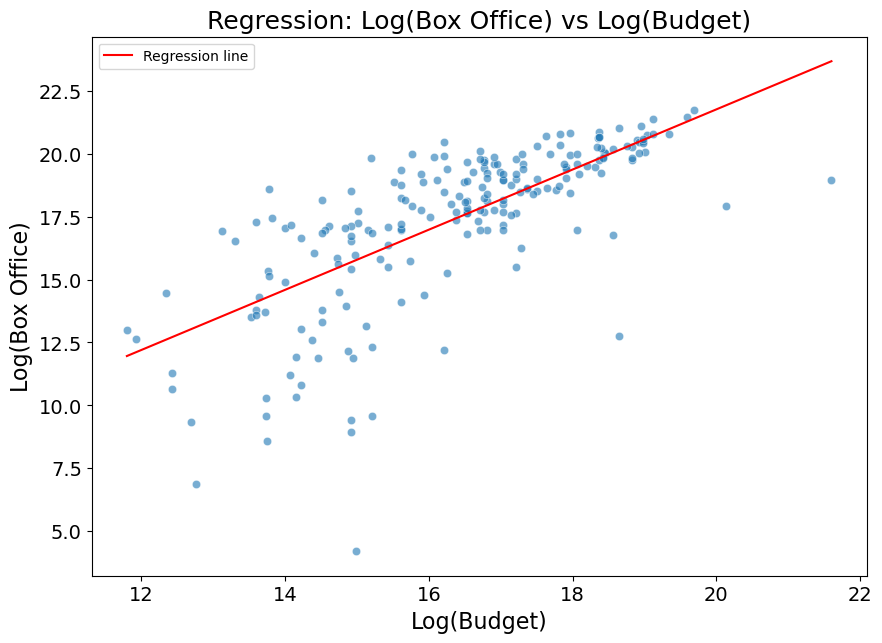


Predicted box office: $429,547,284



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load dataset
df = pd.read_csv("imdb_movies_dataset.csv")

# Keep only relevant columns
df = df[['box_office', 'budget', 'year','rating']]

# Clean box_office, budget, and rating numeric columns (remove text, symbols)
for col in ['box_office', 'budget','rating']:
# make all entries strings
    df[col] = df[col].astype(str)
    
    df = df[df[col] != 'Not Available'] # rows where box_office says "not available"
    
    df[col] = df[col].str.replace(r'[^0-9.]', '', regex=True) # remove symbols, commas, spaces
    
    df[col] = df[col].replace('', np.nan) # replace empty with NaN
    
    df = df.dropna(subset=[col]) # drop rows where box_office is now NaN 

    df[col] = df[col].astype(float) # convert

# Drop rows with missing values
df = df.dropna(subset=['box_office', 'budget', 'year'])

print(f"Dataset size after cleaning: {len(df)} movies")
df.head()

# Log-transform for linearity and stability
df['log_budget'] = np.log(df['budget'])
df['log_box_office'] = np.log(df['box_office'])


# Features and target
X = df[['log_budget']]
y = df['log_box_office']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"  MAE  = {mae:.3f}")
print(f"  RMSE = {rmse:.3f}")
print(f"  R² (test) = {r2:.3f}")

# Scatter plot of log values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['log_budget'], y=df['log_box_office'], alpha=0.6)

# Line of best fit 
x_vals = np.linspace(df['log_budget'].min(), df['log_budget'].max(), 100)
y_vals = model.intercept_ + model.coef_[0] * x_vals 
plt.plot(x_vals, y_vals, color='red', label='Regression line')

plt.title('Regression: Log(Box Office) vs Log(Budget)', fontsize=18)
plt.xlabel('Log(Budget)', fontsize=16)
plt.ylabel('Log(Box Office)', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

coef_df = pd.DataFrame({
    'Feature': ['Intercept', 'log_budget'],
    'Coefficient': [model.intercept_, model.coef_[0]]
})
coef_df



# predict box office for randomly chosen movie
# assume this movie had an $100M budget

new_data = pd.DataFrame({
    'log_budget': [np.log(100_000_000)]   
})

predicted_log_box_office = model.predict(new_data)[0]
predicted_box_office = np.exp(predicted_log_box_office)

print()
print(f"Predicted box office: ${predicted_box_office:,.0f}")
print()

Model Performance:
  MAE  = 1.788
  RMSE = 2.352
  R² (test) = 0.526


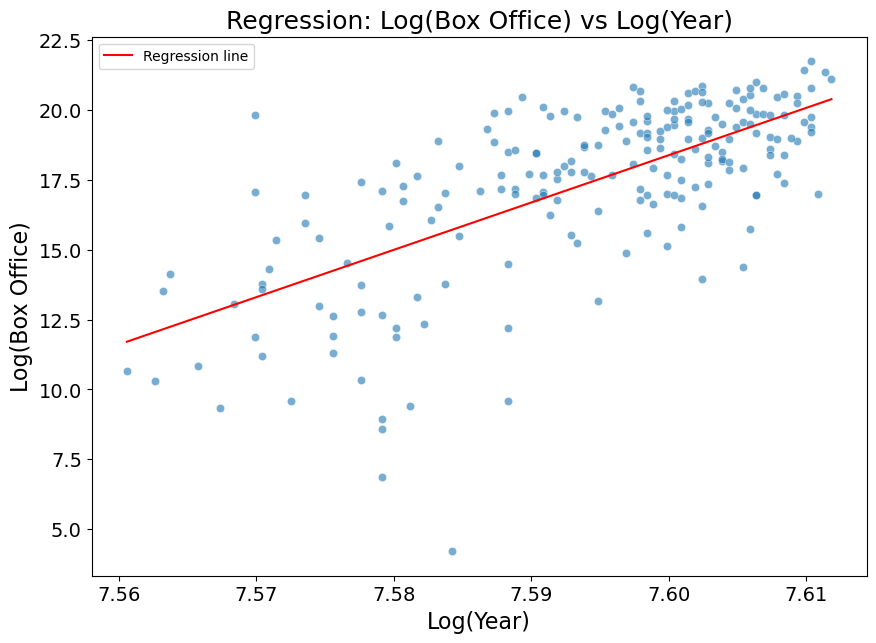


Predicted box office: $1,187,443,225



In [24]:
# do the same, using year as the predictor 

# Log-transform for linearity and stability
df['log_year'] = np.log(df['year'])
df['log_box_office'] = np.log(df['box_office'])


# Features and target
X = df[['log_year']]
y = df['log_box_office']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"  MAE  = {mae:.3f}")
print(f"  RMSE = {rmse:.3f}")
print(f"  R² (test) = {r2:.3f}")

# Scatter plot of log values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['log_year'], y=df['log_box_office'], alpha=0.6)

# Line of best fit 
x_vals = np.linspace(df['log_year'].min(), df['log_year'].max(), 100)
y_vals = model.intercept_ + model.coef_[0] * x_vals 
plt.plot(x_vals, y_vals, color='red', label='Regression line')

plt.title('Regression: Log(Box Office) vs Log(Year)', fontsize=18)
plt.xlabel('Log(Year)', fontsize=16)
plt.ylabel('Log(Box Office)', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

coef_df = pd.DataFrame({
    'Feature': ['Intercept', 'log_year'],
    'Coefficient': [model.intercept_, model.coef_[0]]
})
coef_df



# predict box office for randomly picked year
# assume this movie will be released in 2028

new_data = pd.DataFrame({
    'log_year': [np.log(2028)]   
})

predicted_log_box_office = model.predict(new_data)[0]
predicted_box_office = np.exp(predicted_log_box_office)

print()
print(f"Predicted box office: ${predicted_box_office:,.0f}")
print()

Model Performance:
  MAE  = 1.589
  RMSE = 2.139
  R² (test) = 0.608


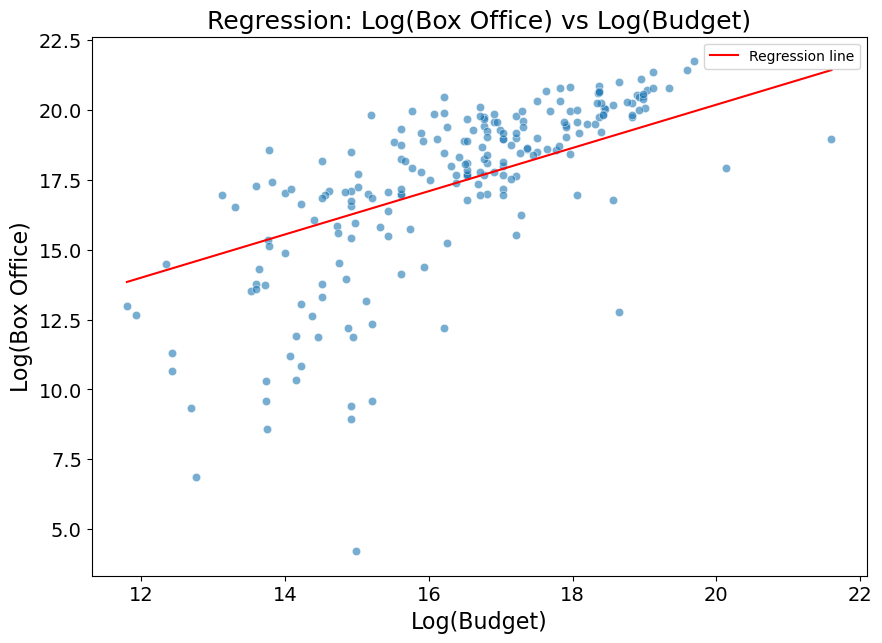


Predicted box office: $2,330,545,896



In [26]:
# Log-transform for linearity and stability
df['log_budget'] = np.log(df['budget'])
df['log_box_office'] = np.log(df['box_office'])

# Center year (for numerical stability)
df['year_centered'] = df['year'] - df['year'].mean()

# Features and target
X = df[['log_budget', 'year_centered']]
y = df['log_box_office']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"  MAE  = {mae:.3f}")
print(f"  RMSE = {rmse:.3f}")
print(f"  R² (test) = {r2:.3f}")

# Scatter plot of log values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['log_budget'], y=df['log_box_office'], alpha=0.6)

# line of best fit (holding year constant)
x_vals = np.linspace(df['log_budget'].min(), df['log_budget'].max(), 100)
year_mean = df['year_centered'].mean()
y_vals = model.intercept_ + model.coef_[0] * x_vals + model.coef_[1] * year_mean
plt.plot(x_vals, y_vals, color='red', label='Regression line')

plt.title('Regression: Log(Box Office) vs Log(Budget)', fontsize=18)
plt.xlabel('Log(Budget)', fontsize=16)
plt.ylabel('Log(Box Office)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

coef_df = pd.DataFrame({
    'Feature': ['Intercept', 'log_budget', 'year_centered'],
    'Coefficient': [model.intercept_, *model.coef_]
})
coef_df



# predict box office for randomly picked budget AND year

future_year = 2030
budget = 200_000_000 

# Build the DataFrame for prediction
new_data = pd.DataFrame({
    'log_budget': [np.log(budget)],
    'year_centered': [future_year - df['year'].mean()]
})

predicted_log_box_office = model.predict(new_data)[0]
predicted_box_office = np.exp(predicted_log_box_office) # convert back

print()
print(f"Predicted box office: ${predicted_box_office:,.0f}")
print()